## Implementing Birch Algorithm on Randomly Created Datasets

BIRCH (Balanced Iterative Reducing and Clustering hierarchies) is a clustering algorithm in machine learning that has been specially designed for clustering on a very large data set. It is often faster than other clustering algorithms like batch K-Means. It provides a very similar result to the batch K-Means algorithm if the number of features in the dataset is not more than 20.

When training the model using the BIRCH algorithm, it creates a tree structure with enough data to quickly assign each data point to a cluster. By storing all the data points in the tree, this algorithm allows the use of limited memory while working on a very large data set. In the section below, I will take you through its implementation by using the Python programming language.

## There are mainly four phases which are followed by the algorithm of BIRCH. 

### Scanning data into memory
### Condense data(resize data)
### Global clustering.  
### Refining clusters.

In these four phases, two of them (resize data and refining clusters) are optional. They come in the process when more clarity is required. But scanning data is just like loading data into a model. After loading the data, the algorithm scans the whole data and fits them into the CF trees. In condensing, it resets and resizes the data for better fitting into the CF tree. In global clustering, it sends  CF trees for clustering using existing clustering algorithms. Finally, refining fixes the problem of CF trees where the same valued points are assigned to different leaf nodes.

Scikit Learn provides the module for direct implementation of BIRCH under the cluster class packages. We need to provide values to the parameters according to the requirement.

### There are three parameters in the BIRCH algorithm.

#### Threshold  
The maximum number of data samples to be considered in a  subcluster of the leaf node in a CF tree.
#### Branching_factor 
It is the factor that is used to specify the number of CF sub-clusters that can be made in a node.
#### N_clusters 
Number of clusters after the final clustering step, which treats the subclusters from the leaves as new samples.

## Importing Libraries

In [129]:
import matplotlib.pyplot as plt #Used for plotting graphs
from sklearn.datasets import make_blobs #Used for creating random dataset
from sklearn.cluster import Birch #Birch is provided under Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

## Generating Dataset

In [56]:
data, clusters = make_blobs(n_samples = 1000, centers = 5, cluster_std = 0.50, random_state = 0)
#We are creating a dataset with 1000 arbitary points which will be equally divided among 12 cluster points , 
#with each cluster's standard deviation as 0.5
data.shape

(1000, 2)

In [57]:
df = pd.DataFrame(dict(x=data[:,0], clusters=data[:,1], label=clusters))

In [120]:
df.head

<bound method NDFrame.head of             x  clusters  label
0   -0.976950  8.193429      3
1   -1.262432  3.040956      2
2    2.440970  1.412383      1
3    2.357828  1.345442      1
4    1.025133  4.595264      0
..        ...       ...    ...
995  1.820251  0.789298      1
996  8.868896 -2.883232      4
997 -1.273285  2.859767      2
998 -1.523005  7.286175      3
999  9.878180 -3.034222      4

[1000 rows x 3 columns]>

### Originally Created Clusters

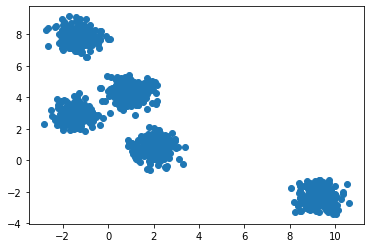

In [59]:
plt.scatter(data[:,0], data[:,1])
plt.show()

## Creating a Birch Model

In [60]:
model = Birch(branching_factor = 50, n_clusters = None ,threshold = 1.5)
#With branching factor as 50 , we have specified max no of subclusters in each node as 50 , 
#the final clustering step won't be performed as we have defined None to n_clusters , 
#and the radius of cluster will be decided by the threshold.

## Fitting the data 

In [61]:
model.fit(data)

Birch(n_clusters=None, threshold=1.5)

Creating the prediction

In [62]:
pred = model.predict(data)

In [88]:
labels_birch = model.labels_

Plotting the results

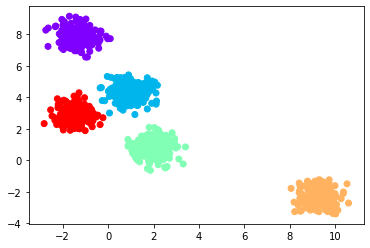

In [63]:
plt.scatter(data[:, 0], data[:, 1], c = pred , cmap='rainbow')
plt.show()

## Checking the accuracy of our model

In [133]:
birch_score = silhouette_score(data, labels_birch)
birch_score

0.7631488155428426

# Thanks a Lot !